In [1]:
from cgeniepy.foram import ForamModel as fm
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from cgeniepy.foram import scd
import matplotlib.transforms as mtransforms

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["font.family"] = "Fira Sans"

In [2]:
def dissimilarity(xmodel, xtime, ymodel=None, ytime=None):

    if not ymodel:
        #print("Detecting the same model")
        ymodel = xmodel

    # to avoid "if not zero = True"
    if not ytime and ytime != 0:
        #print("Detecting the same time")
        ytime = xtime

    foram_names = ["bn", "bs", "sn", "ss"]
    x_assem, y_assem = [],[]

    for i, foram in enumerate(foram_names):
        x_state_foram = fm(xmodel).select_foramtype(foram).relative_abundance().isel(time=xtime)
        y_state_foram = fm(ymodel).select_foramtype(foram).relative_abundance().isel(time=ytime)
        x_assem.append(x_state_foram.pure_array())
        y_assem.append(y_state_foram.pure_array())

    # calculate squared chord distance for each model
    assemblage_1 = np.array(x_assem)
    assemblage_2 = np.array(y_assem)
    return scd(assemblage_1, assemblage_2)

def biomass_diff(xmodel, xtime, ymodel=None, ytime=None, percentage=False):
    if not ymodel:
        #print("Detecting the same model")
        ymodel = xmodel

    # to avoid "if not zero = True"
    if not ytime and ytime != 0:
        #print("Detecting the same time")
        ytime = xtime

    foram_names = ["bn", "bs", "sn", "ss"]
    x_assem, y_assem = [],[]

    for foram in foram_names:
        x_state_foram = fm(xmodel).select_foramtype(foram).biomass().isel(time=xtime).sum().magnitude
        y_state_foram = fm(ymodel).select_foramtype(foram).biomass().isel(time=ytime).sum().magnitude
        x_assem.append(x_state_foram)
        y_assem.append(y_state_foram)

    # calculate squared chord distance for each model
    assemblage_1 = np.array(x_assem).sum()
    assemblage_2 = np.array(y_assem).sum()
    diff = assemblage_1 -assemblage_2
    if percentage:
        return diff/assemblage_2 * 100
    else:
        return diff

/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users/yingrui/cgeniepy/src/cgeniepy/core.py:239: RuntimeWarning: Mean of empty slice
  return np.nanmean(self.pure_array(), *args, **kwargs)
/Users

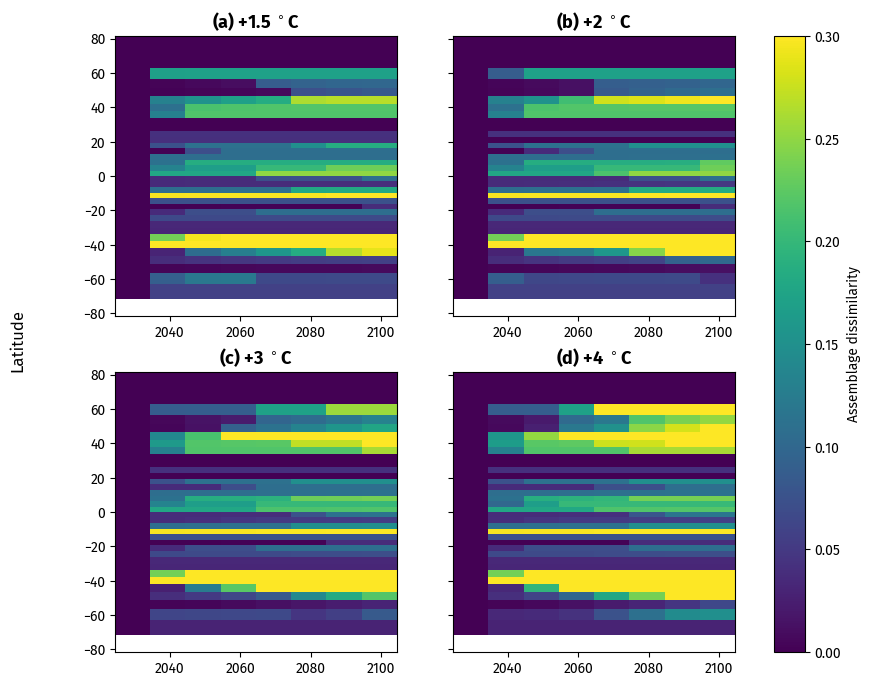

In [13]:
from cgeniepy.grid import GENIE_lat

mod_paths = [
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.1p5deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.2deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.3deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg",
]

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8),
                         sharey=True)

fig.supylabel('Latitude')
titles = [r"(a) +1.5 $^\circ$C", r"(b) +2 $^\circ$C",
          r"(c) +3 $^\circ$C", r"(d) +4 $^\circ$C"]
lat = GENIE_lat(edge=False)

for i, ipath in enumerate(mod_paths):
    model = fm(ipath)
    ax = axes.flat[i]
    ax.set_title(titles[i], fontsize=13, fontweight="bold")
    time = model.select_var("time").array.values
    dt = np.zeros((len(lat), len(time)))
    for iyear in range(len(time)):
        x = dissimilarity(xmodel=ipath, xtime=0, ytime=iyear)
        x_zonal = x.nanmean(axis=1)
        dt[:, iyear] = x_zonal
    p = ax.pcolormesh(time, lat, dt, vmin=0,vmax=0.3)


cbar = fig.colorbar(p, ax=axes.ravel().tolist(), orientation='vertical', pad=0.05)
cbar.set_label("Assemblage dissimilarity")
fig.savefig("../output/zonal_dissimilarity.png", dpi=400)

In [3]:
#biomass_diff(xmodel="../model/muffin.CB.GIteiiva.BASESFeTDTL_rb_foramecogem2.1", xtime=-1,
#             ymodel="../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical", ytime=-1, percentage=True) -> 50% change

#dissimilarity(xmodel="../model/muffin.CB.GIteiiva.BASESFeTDTL_rb_foramecogem2.1", xtime=-1,
#             ymodel="../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical", ytime=-1).nanmean()

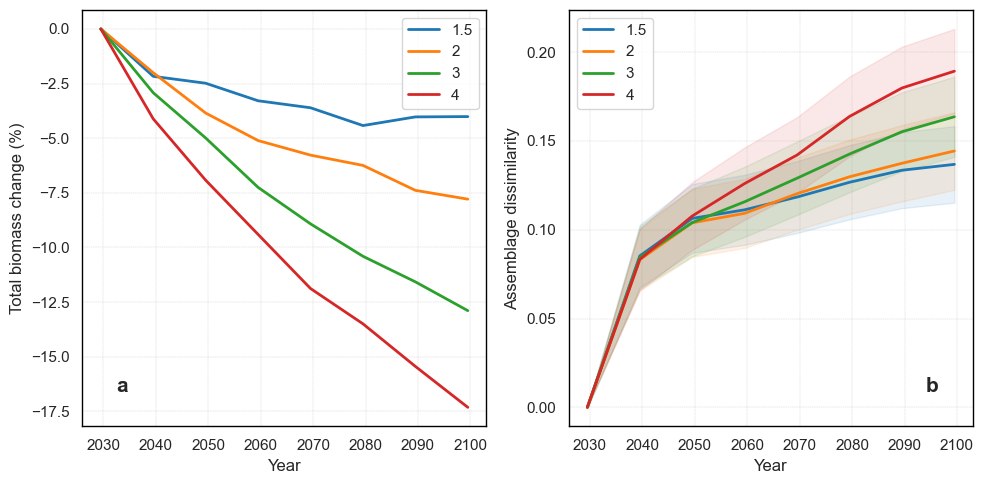

In [5]:
mod_paths = [
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.1p5deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.2deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.3deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg",
]

# Cumulative dissimilarity
sns.set_theme()
sns.set_style("whitegrid")
colors = sns.color_palette("tab10", 4)

dtemp = ["1.5", "2", "3", "4"]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), tight_layout=True)
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)

for i, ipath in enumerate(mod_paths):
    dis = []
    dis_l, dis_u = [],[]
    biomass = []
    time_label = fm(ipath).select_var("time").array.values - 4.5
    # print 2000 year and afterwards
    for j in range(len(time_label)):
        dis.append(dissimilarity(xmodel=ipath, xtime=0, ytime=j).nanmean())
        dis_l.append(dissimilarity(xmodel=ipath, xtime=0, ytime=j).confidence_interval()[0])
        dis_u.append(dissimilarity(xmodel=ipath, xtime=0, ytime=j).confidence_interval()[1])
        biomass.append(biomass_diff(xmodel=ipath, xtime=j, ytime=0, percentage=True))
    dis = np.array(dis)
    biomass = np.array(biomass)
    ax1.plot(time_label, biomass, label=dtemp[i], color=colors[i], linewidth=2)
    ax2.plot(time_label, dis, label=dtemp[i], color=colors[i], linewidth=2)
    ax2.fill_between(time_label, dis_l, dis_u, color=colors[i], alpha=0.1)


for ax in (ax1, ax2):
    ax.set_xlabel("Year")
    ax.grid(True, which='both', linestyle='--', linewidth=0.3)
    ax.legend()

    for position in ['top','bottom','left','right']:
        ax.spines[position].set_linewidth(1)
        ax.spines[position].set_color("black")

ax1.text(0.05, 0.1, "a", transform=ax1.transAxes + trans, weight="bold", fontsize=15)
ax2.text(0.85, 0.1, "b", transform=ax2.transAxes + trans, weight="bold", fontsize=15)

ax1.set_ylabel("Total biomass change (%)")
ax2.set_ylabel("Assemblage dissimilarity")
fig.savefig("../output/assemblage_change.png", dpi=300)